<a href="https://colab.research.google.com/github/charles41onlyy/CCMLRL_EXCERCISES_COM231ML/blob/main/midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Training Data

In [33]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5 non-null      int64  
 1   MonsoonIntensity             5 non-null      int64  
 2   TopographyDrainage           5 non-null      int64  
 3   RiverManagement              5 non-null      int64  
 4   Deforestation                5 non-null      int64  
 5   Urbanization                 5 non-null      int64  
 6   ClimateChange                5 non-null      int64  
 7   DamsQuality                  5 non-null      int64  
 8   Siltation                    5 non-null      int64  
 9   AgriculturalPractices        5 non-null      int64  
 10  ...                          5 non-null      object 
 11  DrainageSystems              5 non-null      int64  
 12  CoastalVulnerability         5 non-null      int64  
 13  Landslides              

In [34]:
df.describe()

,Unnamed: 0,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.0,5.00000,5.000000,5.00000,5.000000,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,2.000000,5.000000,5.400000,4.60000,6.000000,5.0,6.20000,3.000000,4.60000,4.000000,4.60000,2.80000,4.60000,4.600000,4.600000,5.000000,3.400000,4.80000,3.800000,0.475000
std,1.581139,1.224745,2.073644,1.67332,1.581139,2.0,2.04939,1.224745,1.67332,1.224745,2.50998,0.83666,3.04959,1.140175,0.894427,2.915476,1.516575,2.04939,1.095445,0.054199
min,0.000000,3.000000,3.000000,2.00000,4.000000,3.0,4.00000,1.000000,3.00000,3.000000,2.00000,2.00000,0.00000,3.000000,4.000000,1.000000,2.000000,3.00000,3.000000,0.415000
25%,1.000000,5.000000,4.000000,4.00000,5.000000,4.0,4.00000,3.000000,3.00000,3.000000,2.00000,2.00000,3.00000,4.000000,4.000000,3.000000,2.000000,3.00000,3.000000,0.445000
50%,2.000000,5.000000,5.000000,5.00000,6.000000,4.0,7.00000,3.000000,5.00000,4.000000,5.00000,3.00000,6.00000,5.000000,4.000000,6.000000,3.000000,4.00000,3.000000,0.450000
75%,3.000000,6.000000,7.000000,6.00000,7.000000,6.0,8.00000,4.000000,5.00000,4.000000,7.00000,3.00000,7.00000,5.000000,5.000000,7.000000,5.000000,7.00000,5.000000,0.530000
max,4.000000,6.000000,8.000000,6.00000,8.000000,8.0,8.00000,4.000000,7.00000,6.000000,7.00000,4.00000,7.00000,6.000000,6.000000,8.000000,5.000000,7.00000,5.000000,0.535000


## VIZUALIZATION


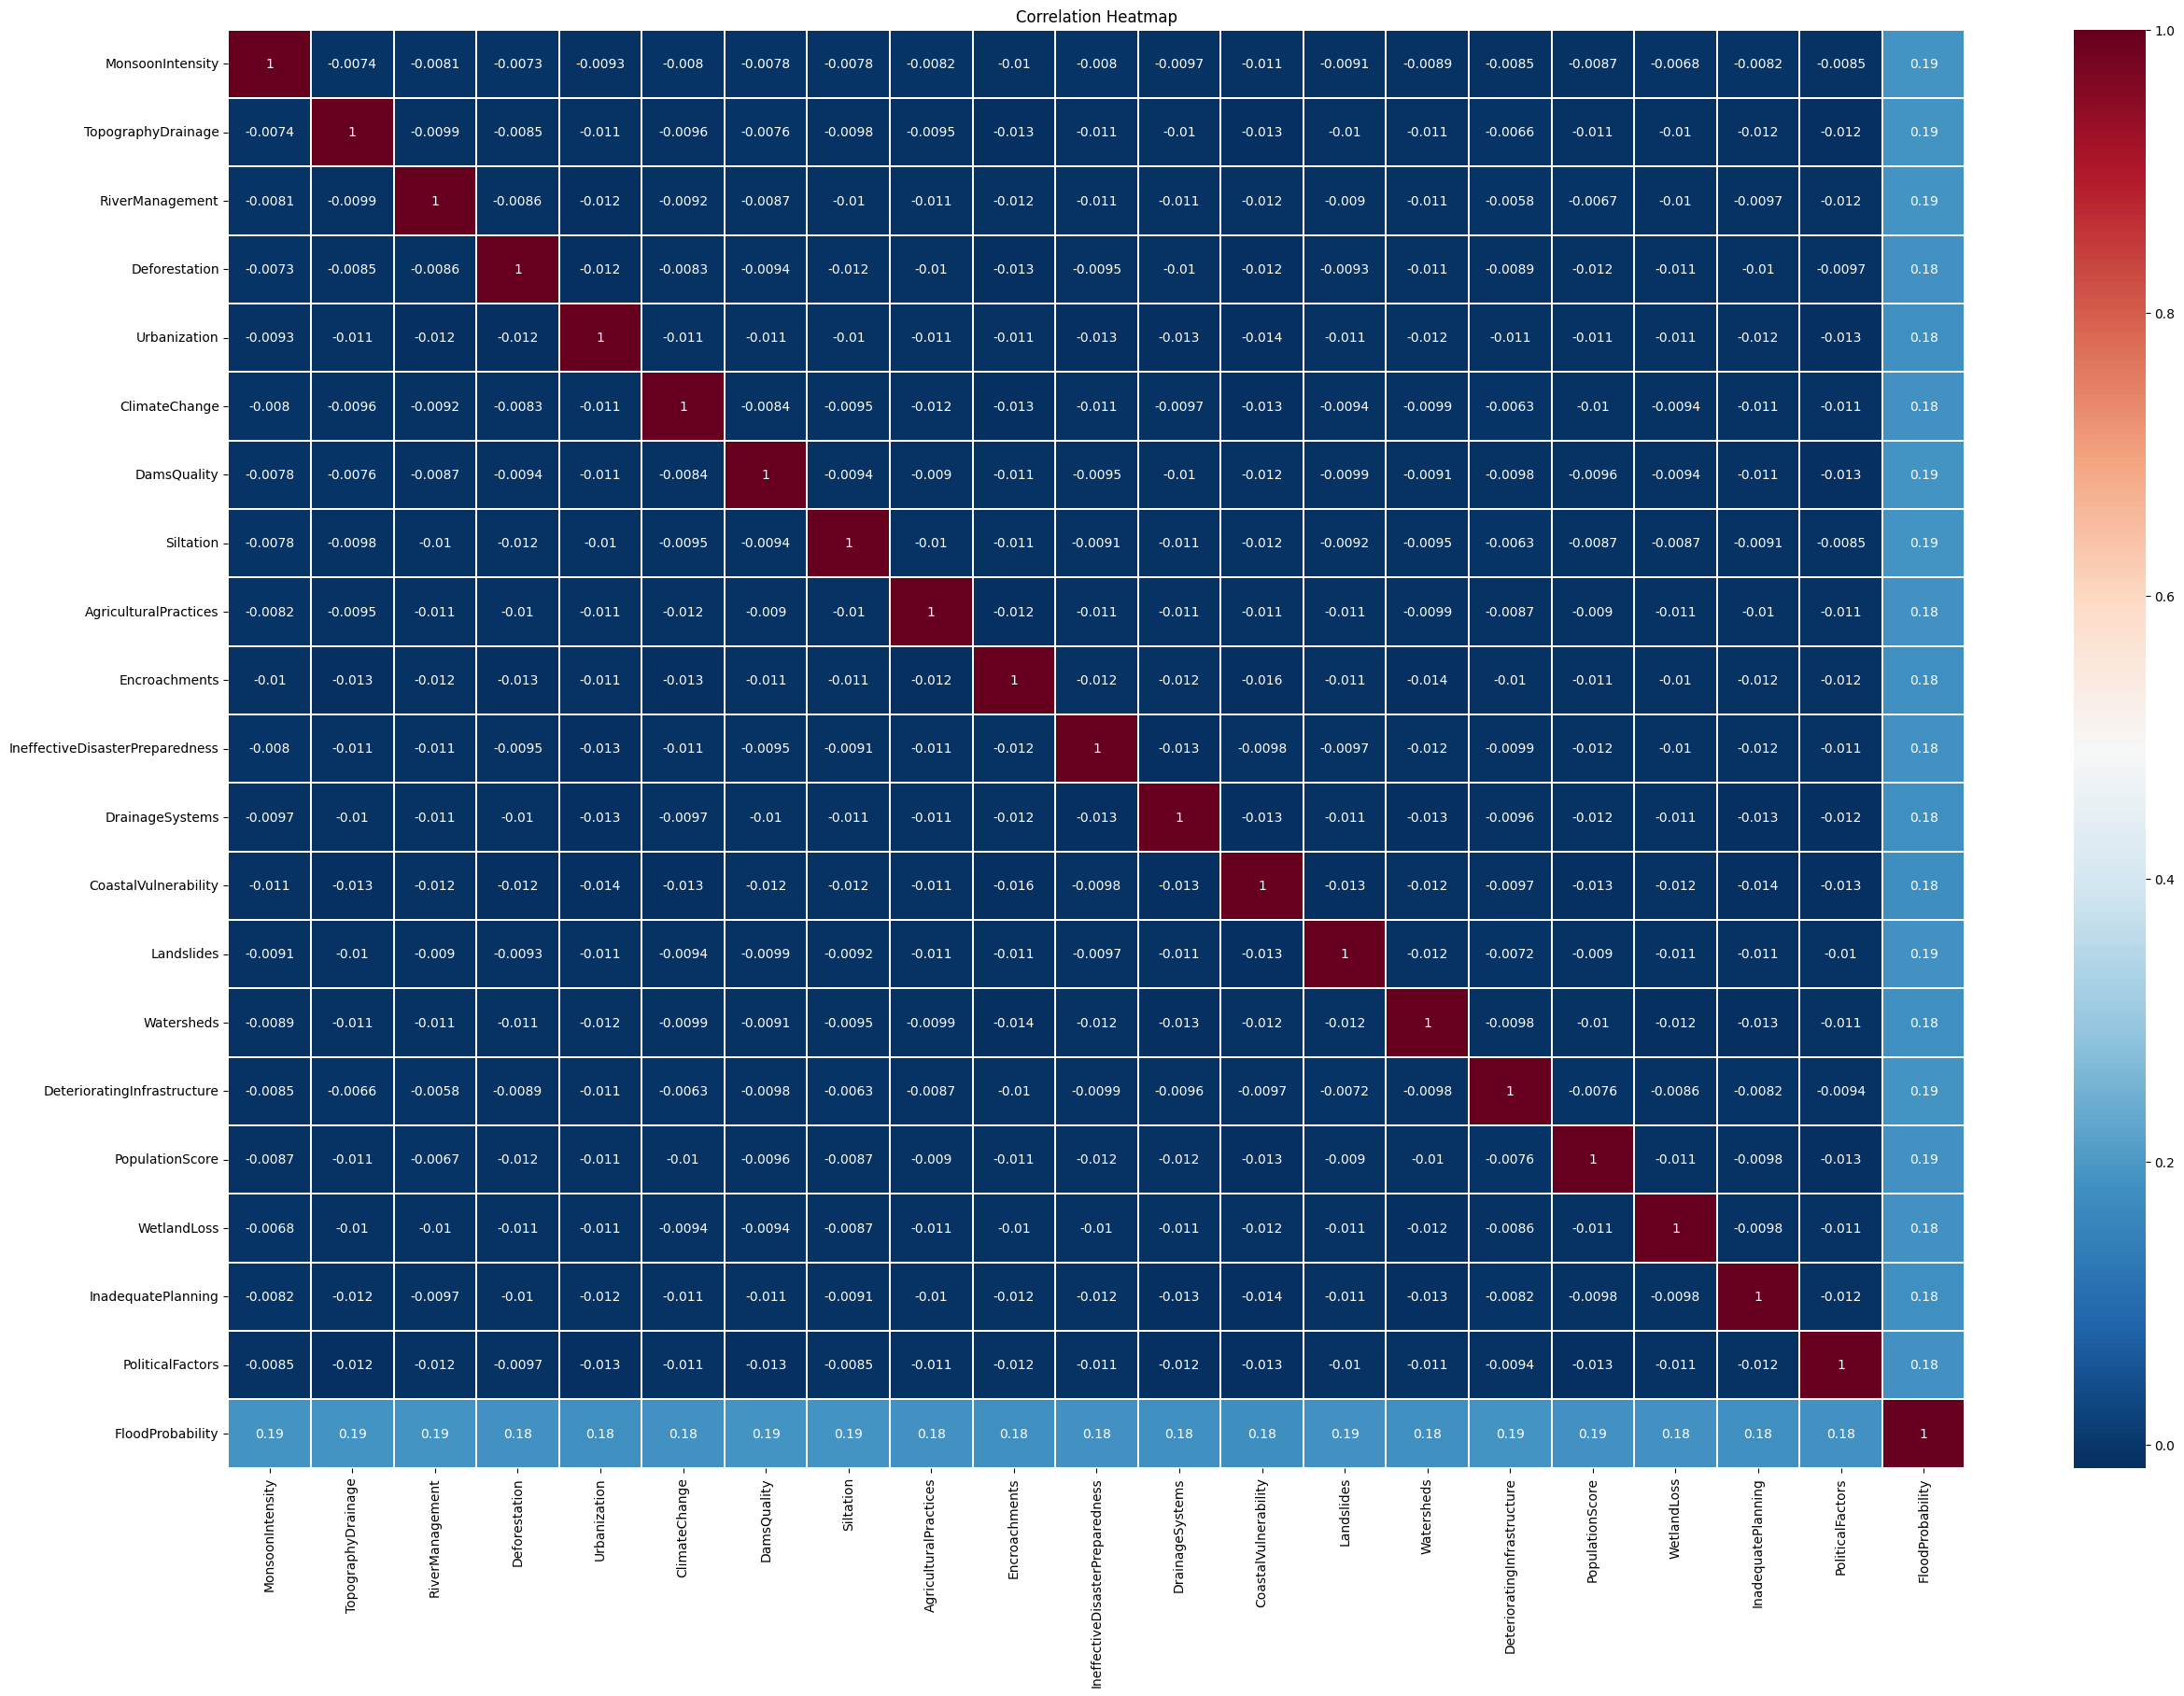

In [40]:
plt.figure(figsize=(30,20))
corr = traindata.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu_r', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

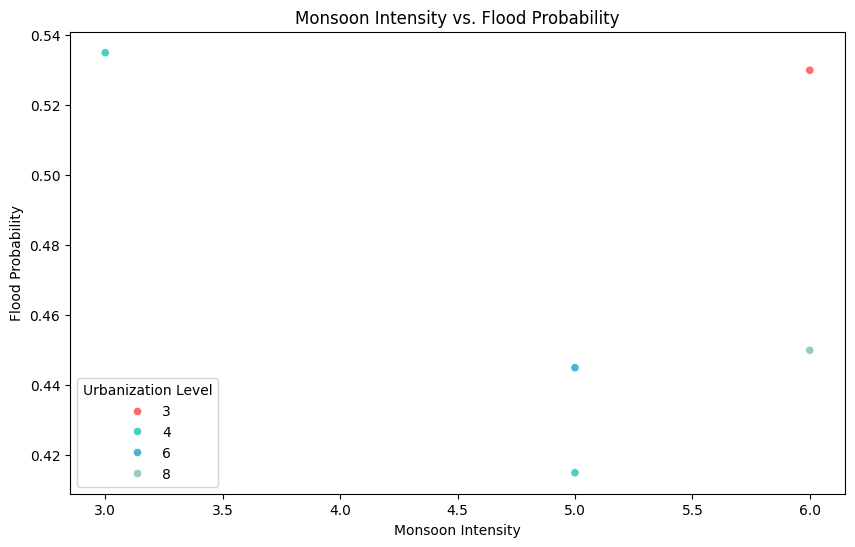

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonsoonIntensity', y='FloodProbability', hue='Urbanization', palette=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Monsoon Intensity vs. Flood Probability')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Level')
plt.show()

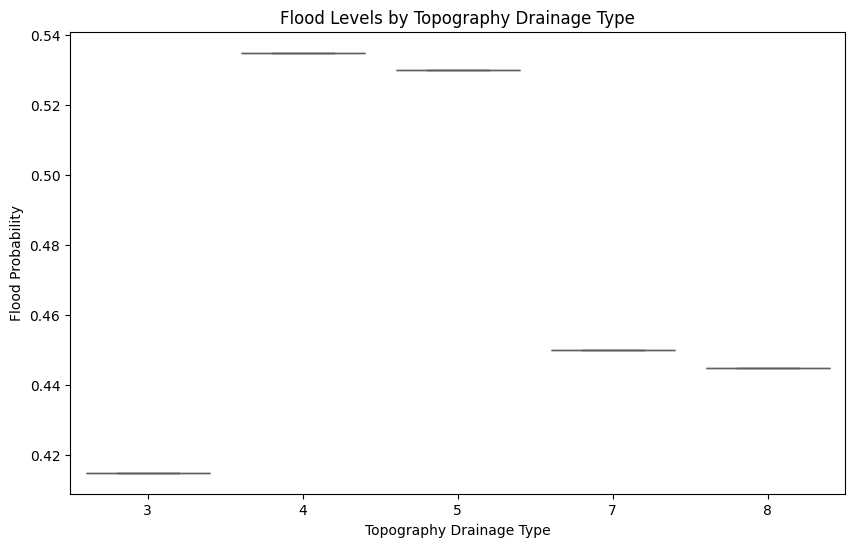

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TopographyDrainage', y='FloodProbability', palette='coolwarm')
plt.title('Flood Levels by Topography Drainage Type')
plt.xlabel('Topography Drainage Type')
plt.ylabel('Flood Probability')
plt.show()

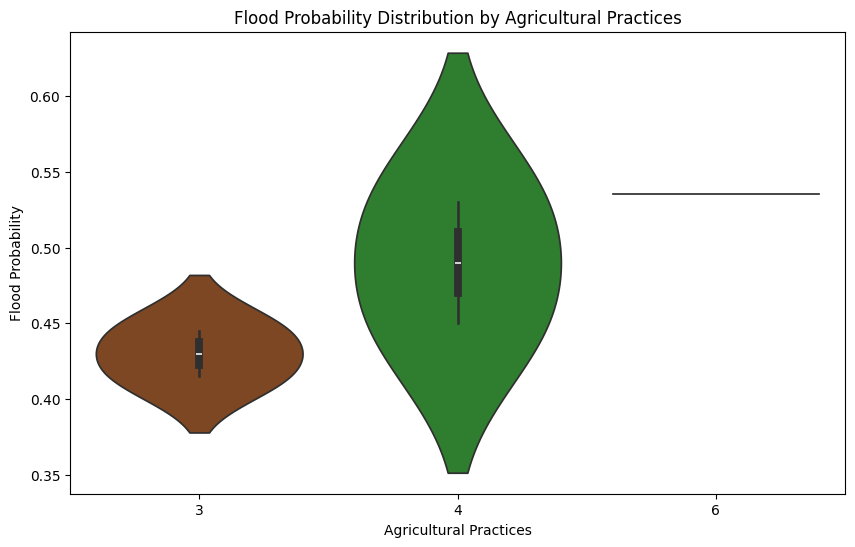

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AgriculturalPractices', y='FloodProbability',
               palette=['#8B4513', '#228B22', '#DAA520', '#CD853F', '#6B8E23'])
plt.title('Flood Probability Distribution by Agricultural Practices')
plt.xlabel('Agricultural Practices')
plt.ylabel('Flood Probability')
plt.show()

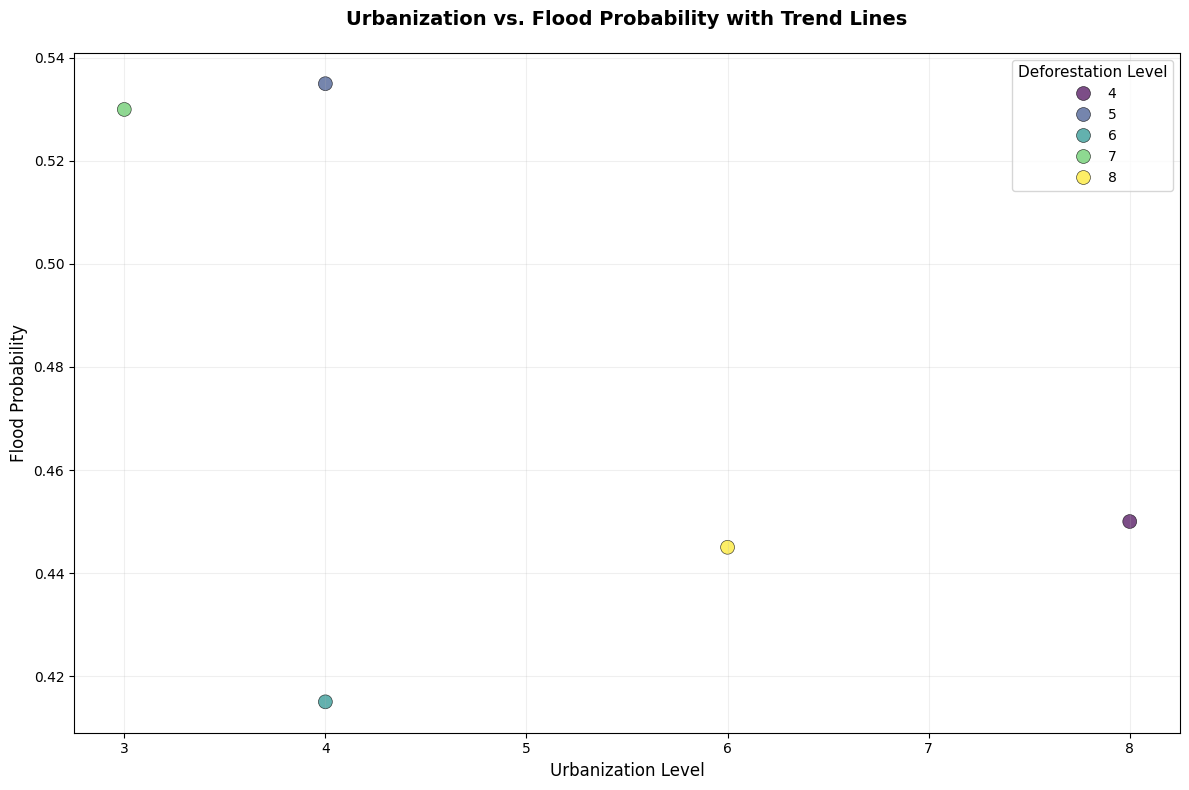

In [46]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='Urbanization', y='FloodProbability',
                         hue='Deforestation', palette='viridis',
                         s=100, alpha=0.7, edgecolor='black', linewidth=0.5)

# Add regression lines for each deforestation level
sns.regplot(data=df[df['Deforestation'] == df['Deforestation'].unique()[0]],
            x='Urbanization', y='FloodProbability',
            scatter=False, color=plt.cm.viridis(0.2), line_kws={'linestyle': '--'})
sns.regplot(data=df[df['Deforestation'] == df['Deforestation'].unique()[-1]],
            x='Urbanization', y='FloodProbability',
            scatter=False, color=plt.cm.viridis(0.8), line_kws={'linestyle': '--'})

plt.title('Urbanization vs. Flood Probability with Trend Lines',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Urbanization Level', fontsize=12)
plt.ylabel('Flood Probability', fontsize=12)
plt.legend(title='Deforestation Level', title_fontsize=11, fontsize=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

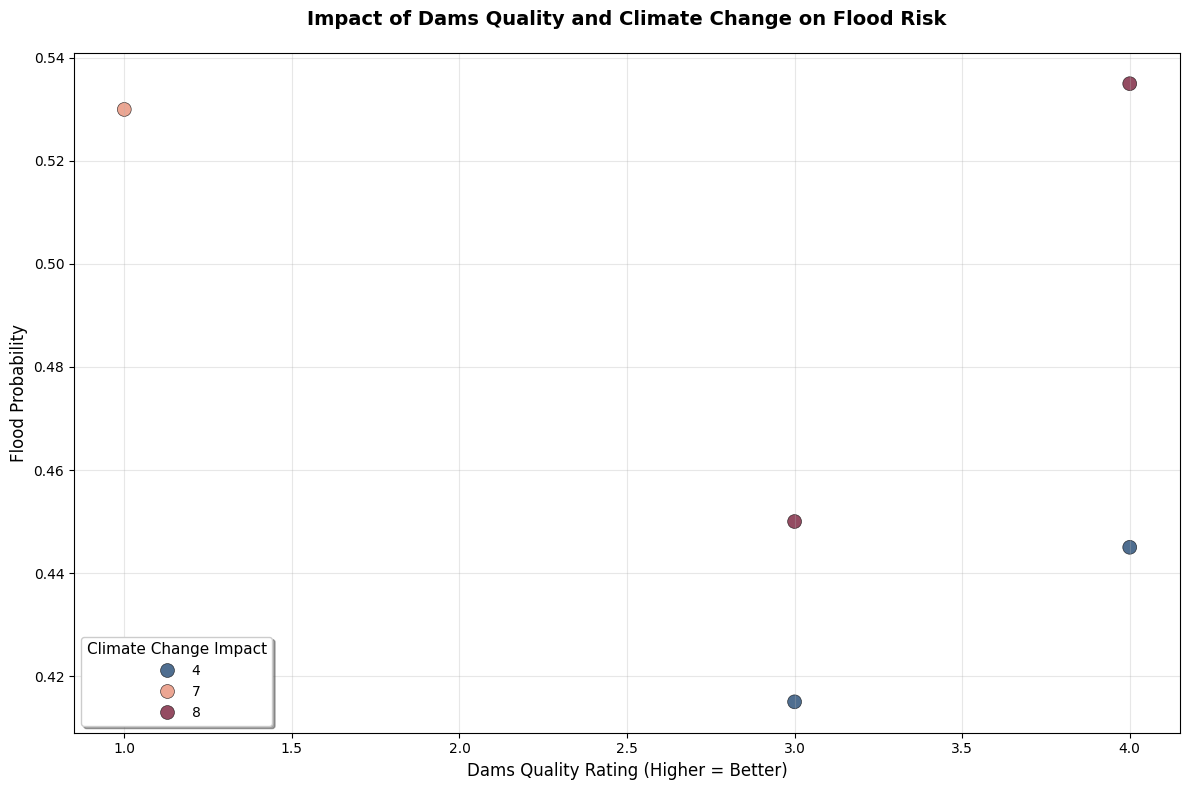

In [47]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='DamsQuality', y='FloodProbability',
               hue='ClimateChange', palette='RdBu_r',  # Red to Blue - intuitive for climate impact
               s=100, alpha=0.7, edgecolor='black', linewidth=0.5)

plt.title('Impact of Dams Quality and Climate Change on Flood Risk',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Dams Quality Rating (Higher = Better)', fontsize=12)
plt.ylabel('Flood Probability', fontsize=12)
plt.legend(title='Climate Change Impact', title_fontsize=11, fontsize=10,
           frameon=True, fancybox=True, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## TEST DATA

In [50]:
x=traindata.drop(['id','FloodProbability'],axis=1)
y=traindata[['FloodProbability']]

In [51]:
x.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


## TEST FILE


In [55]:

test_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true"
testdata = pd.read_csv(test_url)

testdata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


## Sample Submission File

In [58]:
import pandas as pd

# Load sample submission file to get IDs
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)

# Prepare features for prediction
X_final = testdata.drop(columns=["id"], errors='ignore')

# Predict using the trained model
y_pred = model.predict(X_final)

# Flatten y_pred if it's 2D
y_pred = y_pred.ravel()  # Converts (n_samples, 1) -> (n_samples,)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': samplefile['id'],  # Make sure IDs align with testdata
    'FloodProbability': y_pred
})

# Save submission file
submission_df.to_csv("submission_file.csv", index=False)
print("Submission file created: submission_file.csv")

# Show first few rows
print(submission_df.head())

Submission file created: submission_file.csv
        id  FloodProbability
0  1117957          0.573613
1  1117958          0.455271
2  1117959          0.454752
3  1117960          0.466179
4  1117961          0.466085


In [57]:
# Split the training data for validation (optional but good practice)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!
